<a href="https://colab.research.google.com/github/jaehyeon1229/cho-bo-ja/blob/main/%EC%8B%9C%EA%B3%84%EC%97%B4_%EB%B6%84%EC%84%9D_%EA%B3%B5%EB%B6%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 시계열 분석: ARIMA 예측모델
시간에 따른 연속형 변수의 예측 및 Trend 파악
여기서 시간은 특정 간격을 가진 주기 : Lag
Lag에서 Data point의 특성을 찾는것

In [ ]:
# 분석 및 시각화 라이브러리
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt

# 한글폰트 조정
mpl.rc('font',family= 'Malgun Gothic')

In [ ]:
df1 = pd.read_csv('Data11.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803675 entries, 0 to 803674
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   구매일     803675 non-null  object
 1   구매금액    803675 non-null  int64 
 2   물품대분류   803675 non-null  object
dtypes: int64(1), object(2)
memory usage: 18.4+ MB


In [ ]:
df1.head()

,구매일,구매금액,물품대분류
0,2018-04-20,57120,기저귀
1,2018-04-20,15900,더블하트
2,2018-04-20,7000,더블하트
3,2018-04-20,20900,더블하트
4,2018-05-06,26500,더블하트


In [ ]:
df1.tail()

,구매일,구매금액,물품대분류
803670,2020-08-06,30960,더블하트
803671,2020-08-06,6640,더블하트
803672,2020-08-06,5600,더블하트
803673,2020-08-06,7840,더블하트
803674,2020-08-06,8500,기타


In [ ]:
# 구매일을 datetime형태로 변환
pd.to_datetime(df1['구매일'])

0        2018-04-20
1        2018-04-20
2        2018-04-20
3        2018-04-20
4        2018-05-06
            ...    
803670   2020-08-06
803671   2020-08-06
803672   2020-08-06
803673   2020-08-06
803674   2020-08-06
Name: 구매일, Length: 803675, dtype: datetime64[ns]

In [ ]:
# 처음과 마지막 날짜, 
# top = 데이터량이 가장 많은 날 = 10500
# unique = 일 수
df1['Datetime'] = pd.to_datetime(df1['구매일'])
df1['Datetime'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """


count                  803675
unique                    589
top       2019-10-11 00:00:00
freq                    10500
first     2018-04-20 00:00:00
last      2020-08-07 00:00:00
Name: Datetime, dtype: object

In [ ]:
# 날짜 형태로 바꾼 것을 dt함수로 연,월,주,요일로 만들어준다. 
df1['year'] = df1['Datetime'].dt.year
df1['month'] = df1['Datetime'].dt.month
df1['week'] = df1['Datetime'].dt.week
df1['day_of_week'] = df1['Datetime'].dt.day_name() # 요일

df1.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


,구매일,구매금액,물품대분류,Datetime,year,month,week,day_of_week
0,2018-04-20,57120,기저귀,2018-04-20,2018,4,16,Friday
1,2018-04-20,15900,더블하트,2018-04-20,2018,4,16,Friday
2,2018-04-20,7000,더블하트,2018-04-20,2018,4,16,Friday
3,2018-04-20,20900,더블하트,2018-04-20,2018,4,16,Friday
4,2018-05-06,26500,더블하트,2018-05-06,2018,5,18,Sunday
5,2018-05-14,20600,FC,2018-05-14,2018,5,20,Monday
6,2018-08-12,49900,더블하트,2018-08-12,2018,8,32,Sunday
7,2018-08-12,25800,더블하트,2018-08-12,2018,8,32,Sunday
8,2018-09-01,14400,FMC,2018-09-01,2018,9,35,Saturday
9,2018-09-01,14800,FMC,2018-09-01,2018,9,35,Saturday


In [ ]:
# 일자별로 구매금액의 총합을 구한다(피보팅 사용)
p1 = pd.pivot_table(data=df1, index='Datetime',
               values='구매금액', aggfunc='sum').reset_index()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_te

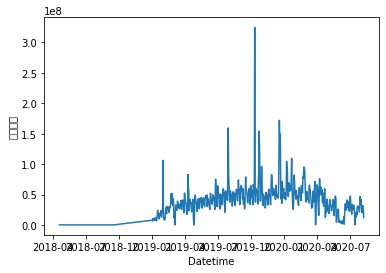

In [ ]:
sns.lineplot(data=p1, x='Datetime', y='구매금액')

In [ ]:
# 물품별로 오버레이 시킬 수도 있다
p2 = pd.pivot_table(data=df1,
                    index=['Datetime', '물품대분류'],
                    values='구매금액', aggfunc='sum').reset_index()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_te

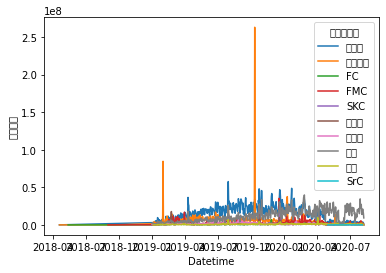

In [ ]:
sns.lineplot(data=p2, x='Datetime', y='구매금액', hue='물품대분류')
# 너무 큰차이를 보이는 물품인 기저귀 데이터를 확인했다. 이후 예측값에 대한 부정확한 정보가 될 수 있다.

In [ ]:
# 기저귀 데이터 분류
cond1 = (df1['물품대분류']=='기저귀')
df1.loc[cond1]

,구매일,구매금액,물품대분류,Datetime,year,month,week,day_of_week
0,2018-04-20,57120,기저귀,2018-04-20,2018,4,16,Friday
29,2019-05-13,59520,기저귀,2019-05-13,2019,5,20,Monday
30,2019-05-10,50640,기저귀,2019-05-10,2019,5,19,Friday
31,2019-06-06,50640,기저귀,2019-06-06,2019,6,23,Thursday
32,2019-07-01,50640,기저귀,2019-07-01,2019,7,27,Monday
...,...,...,...,...,...,...,...,...
803578,2020-06-25,43400,기저귀,2020-06-25,2020,6,26,Thursday
803602,2020-06-26,43400,기저귀,2020-06-26,2020,6,26,Friday
803610,2020-06-28,49900,기저귀,2020-06-28,2020,6,26,Sunday
803631,2020-07-09,49900,기저귀,2020-07-09,2020,7,28,Thursday


In [ ]:
# 18-04-20에서 19-05-13 사이의 데이터의 부재로, 추세를 확인할 수 없기 때문에 제거해준다
df2 = df1.loc[cond1].iloc[1:]
df2.head()

,구매일,구매금액,물품대분류,Datetime,year,month,week,day_of_week
29,2019-05-13,59520,기저귀,2019-05-13,2019,5,20,Monday
30,2019-05-10,50640,기저귀,2019-05-10,2019,5,19,Friday
31,2019-06-06,50640,기저귀,2019-06-06,2019,6,23,Thursday
32,2019-07-01,50640,기저귀,2019-07-01,2019,7,27,Monday
33,2019-07-29,101280,기저귀,2019-07-29,2019,7,31,Monday


#**ARIMA** (Auto Regressive Integrated Moving Average Model)

**AR** (Auto Regerssive Model): 자기회귀모델 - *p* 시점 전의 자료가 현재 시점의 데이터에 영향을 주는 모델
-> 시계열 데이터 중간의 불필요한 변수에 대한 설명 능력이 떨어진다.

ACF: 자기상관함수 / 특정 구간내 데이터(ex.교회수와 범죄율)간 상관관계파악 그러나 외부적인 요인(인구수)을 고려하지 않은 상태

PACF: 부분자기상관함수.외부적인 요인(인구수)을 배제한 상태에서의 두 지표간 관련성을 파악. 두 개의 독립변수가 서로 상관관계가 있어보이는 현상을 방지한다.

**MA** (Moving Average Model): 일정구간 데이터의 평균을 계산하여 미래를 예측하는 모델
-> 불규칙적인 데이터에 대한 평균을 계산하기 때문에 변동성을 줄일 수 있다.

**difference** 차분: 평균이 증가하거나 감소하는 데이터에 대해서 모델을 정상적으로 변환시켜준다.



**ARIMA Model**
1. 단기예측에 적합
2. 일정한 트렌드를 띄는 계절적 변동요인이 있어야 한다.
3. 표본의 크기 > 50
4. 정성적 자료 -> 차분

In [ ]:
import statsmodels.tsa.api as tsa
df2

,구매일,구매금액,물품대분류,Datetime,year,month,week,day_of_week
29,2019-05-13,59520,기저귀,2019-05-13,2019,5,20,Monday
30,2019-05-10,50640,기저귀,2019-05-10,2019,5,19,Friday
31,2019-06-06,50640,기저귀,2019-06-06,2019,6,23,Thursday
32,2019-07-01,50640,기저귀,2019-07-01,2019,7,27,Monday
33,2019-07-29,101280,기저귀,2019-07-29,2019,7,31,Monday
...,...,...,...,...,...,...,...,...
803578,2020-06-25,43400,기저귀,2020-06-25,2020,6,26,Thursday
803602,2020-06-26,43400,기저귀,2020-06-26,2020,6,26,Friday
803610,2020-06-28,49900,기저귀,2020-06-28,2020,6,26,Sunday
803631,2020-07-09,49900,기저귀,2020-07-09,2020,7,28,Thursday


In [ ]:
df_time2 = pd.pivot_table(data=df2, index='Datetime'
                         , values='구매금액', aggfunc='sum').reset_index()
df_time2.set_index('Datetime')

,구매금액
Datetime,
2019-01-01,3051240
2019-01-02,2556280
2019-01-03,2729480
2019-01-04,2238440
2019-01-05,2478680
...,...
2020-08-03,3075900
2020-08-04,4010200
2020-08-05,2937800


In [ ]:
# 일자별로 데이터를 합치기
df_time = pd.pivot_table(data=df2, index='Datetime'
                         , values='구매금액', aggfunc='sum')
df_time.head()

,구매금액
Datetime,
2019-01-01,3051240
2019-01-02,2556280
2019-01-03,2729480
2019-01-04,2238440
2019-01-05,2478680


In [ ]:
# 시계열 분석을 일단위로 분석 실행
y = df_time['구매금액'].resample('1D').mean()
y

Datetime
2019-01-01    3051240.0
2019-01-02    2556280.0
2019-01-03    2729480.0
2019-01-04    2238440.0
2019-01-05    2478680.0
                ...    
2020-08-03    3075900.0
2020-08-04    4010200.0
2020-08-05    2937800.0
2020-08-06    2647000.0
2020-08-07    1022300.0
Freq: D, Name: 구매금액, Length: 585, dtype: float64

In [ ]:
# missing값이 있는 지 확인해준다
y.isnull().sum()

7

In [ ]:
# missing 값이 있을 경우 채워준다 앞은 ffill, 뒤는 bfill
y1 = p1.fillna(method='ffill')

# ***1. 시계열 분해***
1. Trend: 일자별 구매금액의 추세요인
2. Seasonal: 계절요인
3. Residual: 변동성요인

In [ ]:
# 그래프 사이즈 조절 함수
from pylab import rcParams
rcParams['figure.figsize'] = 15,10

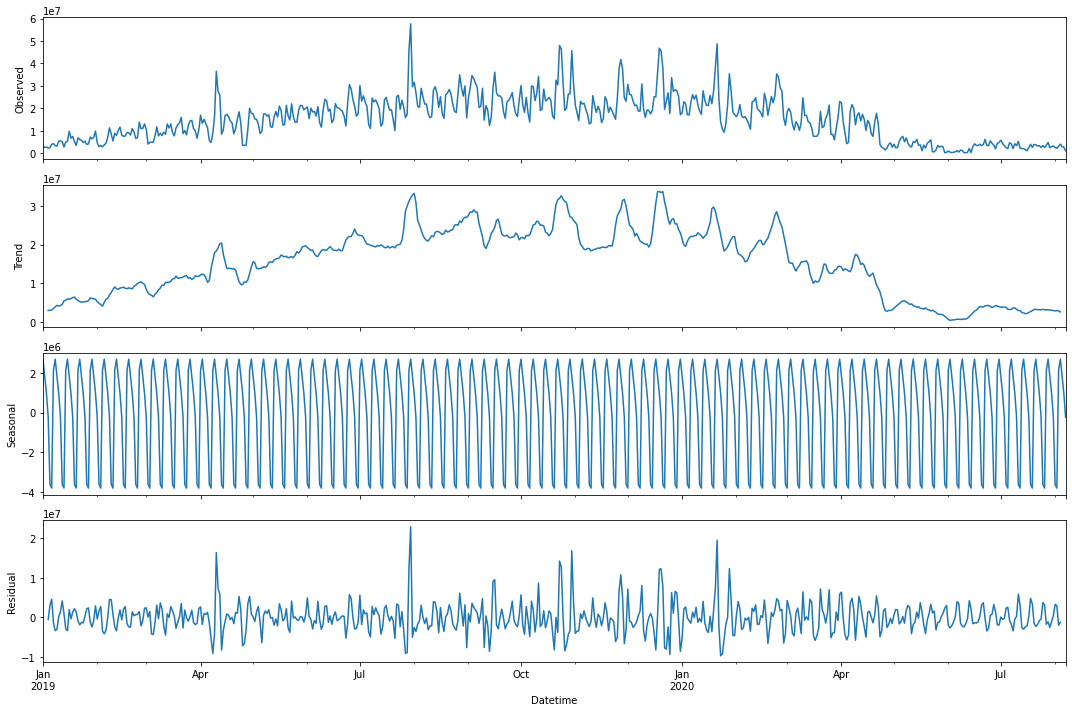

In [ ]:
# 시계열 모델 생성
model_series = tsa.seasonal_decompose(y1, model='additive')
# 모델 시각화
fig = model_series.plot()

In [ ]:
import itertools

p=d=q = range(0,2)
pdq = list(itertools.product(p, d, q)) # p는 이전 시점의 데이터가 영향을 주는지 의미, d는 difference

# p, d, q값들을 난수를 부여하여 조합을 만든다. 그리고 각각에 해당하는 Arima모델을 만든다  
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [ ]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [ ]:
param_list = []
param_seasonal_list = []
results_AIC_list = []

In [ ]:
# 어떤 ARIMA모델이 가장 정확하게 도출이 되는지 구성하는 코드
for param in pdq:
  for param_seasonal in seasonal_pdq:
    try:
      mod = tsa.statespace.SARIMAX(y1,order=param,
                                  seasonal_order=param_seasonal,
                                  enforce_stationarity = False,
                                  enforce_invertibility = False)
      results = mod.fit()
      param_list.append(param)
      param_seasonal_list.append(param_seasonal)
      results_AIC_list.append(results.aic)
    except:
      continue

In [ ]:
ARIMA_list = pd.DataFrame({'Parameter':param_list,'Seasonal':param_seasonal_list,'AIC':results_AIC_list})
ARIMA_list.to_excel('arima_model_list.xlsx')

In [ ]:
# 가장 성능이 좋았던 파라미터를 찾아준다.
ARIMA_list.sort_values(by='AIC') # ACI값이 낮을 수록 모형 적합도가 높다

,Parameter,Seasonal,AIC
43,"(1, 0, 1)","(0, 1, 1, 12)",18983.237154
47,"(1, 0, 1)","(1, 1, 1, 12)",18983.666910
23,"(0, 1, 0)","(1, 1, 1, 12)",19009.286110
63,"(1, 1, 1)","(1, 1, 1, 12)",19011.472166
59,"(1, 1, 1)","(0, 1, 1, 12)",19011.967429
...,...,...,...
9,"(0, 0, 1)","(0, 0, 1, 12)",20243.619505
12,"(0, 0, 1)","(1, 0, 0, 12)",20256.568197
1,"(0, 0, 0)","(0, 0, 1, 12)",20486.120636
8,"(0, 0, 1)","(0, 0, 0, 12)",20744.606738


In [ ]:
# 최종적인 모델을 사용
mod = tsa.statespace.SARIMAX(y1,order=(1, 0, 1),seasonal_order=(0, 1, 1, 12),
                              enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                               구매금액   No. Observations:                  585
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood               -9487.619
Date:                            Thu, 27 Jan 2022   AIC                          18983.237
Time:                                    04:30:56   BIC                          19000.542
Sample:                                01-01-2019   HQIC                         18989.995
                                     - 08-07-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5723      0.061      9.334      0.000       0.452       0.692
ma.L1          0.2837      0.073   

Parameter란?

z?